# Visualize ModelNet40 Dataset
## Load manually by hdf5 file

In [1]:
import h5py
import numpy as np
# import pptk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
datasets_path = "data"
modelnet40_path = f'{datasets_path}/modelnet40_ply_hdf5_2048'

pc_h5 = h5py.File(f'{modelnet40_path}/ply_data_test0.h5', 'r')
print(pc_h5.keys())

point_clouds = np.array(pc_h5['data']) # (2048, 2048, 3), (2048 Examples, 2048 Points, 3 Coordinates)
labels = np.array(pc_h5['label'])
faceId = np.array(pc_h5['faceId'])
normal = np.array(pc_h5['normal'])
print("Point Cloud Shape:", point_clouds.shape)
print("Labels shape:", labels.shape)

<KeysViewHDF5 ['data', 'faceId', 'label', 'normal']>
Point Cloud Shape: (2048, 2048, 3)
Labels shape: (2048, 1)


In [21]:
# Read from shape names file
shape_names_file = open(f'{modelnet40_path}/shape_names.txt', 'r')
names = shape_names_file.read().split('\n')

# Read from shape names file
item = 2047
print("Label", labels[item].shape, names[labels[item][0]])
print("Faceid", faceId[item].shape, faceId[item][0])
print("Normal", normal[item].shape, faceId[item][0])
# pptk.viewer(point_clouds[item,:, :])
print(point_clouds[item].shape)

# X, Y, Z
X, Y, Z = point_clouds[item, :, 0], point_clouds[item, :, 1], point_clouds[item, :, 2]

Label (1,) person
Faceid (2048,) 6931
Normal (2048, 3) 6931
(2048, 3)


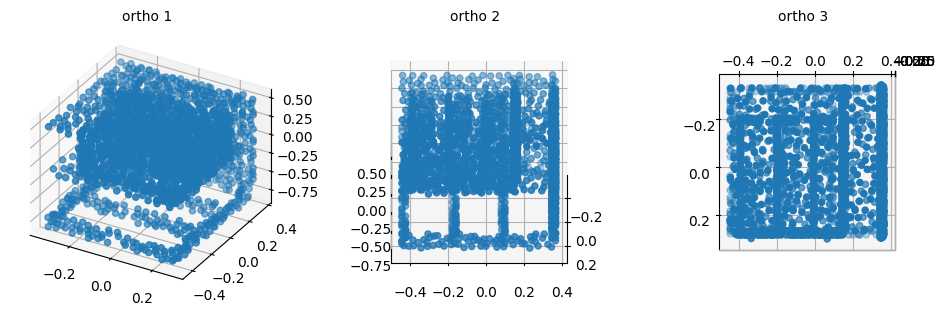

In [4]:
# Plot different perspectives of the point cloud.
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(12, 4))
for ax in axs:
    ax.scatter(X, Y, Z)

# Set the orthographic projection.
axs[0].set_proj_type('ortho')  # FOV = 0 deg
axs[0].set_title("ortho 1", fontsize=10)

axs[1].set_proj_type('ortho')  # FOV = 0 deg
axs[1].set_title("ortho 2", fontsize=10)
axs[1].view_init(elev=30, azim=0)

axs[2].set_proj_type('ortho')  # FOV = 0 deg
axs[2].set_title("ortho 3", fontsize=10)
axs[2].view_init(elev=90, azim=0)

plt.show()


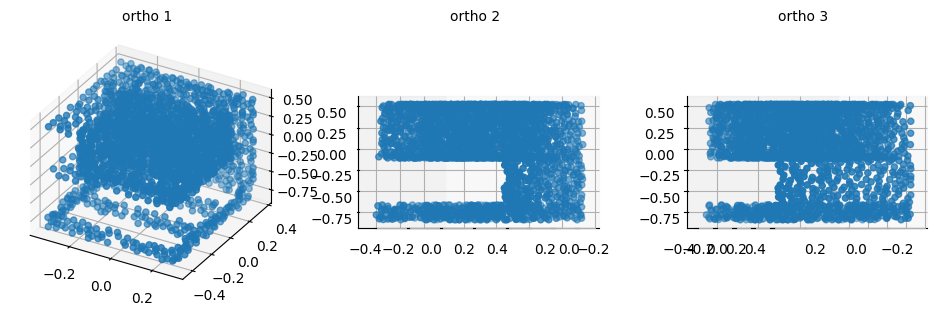

In [5]:
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(12, 4))

for ax in axs:
    ax.scatter(X, Y, Z)

# Set the orthographic projection.
axs[0].set_proj_type('ortho')  # FOV = 0 deg
axs[0].set_title("ortho 1", fontsize=10)

axs[1].set_proj_type('ortho')  # FOV = 0 deg
axs[1].set_title("ortho 2", fontsize=10)
axs[1].view_init(elev=0, azim=30)

axs[2].set_proj_type('ortho')  # FOV = 0 deg
axs[2].set_title("ortho 3", fontsize=10)
axs[2].view_init(elev=0, azim=60)

plt.show()


ffmpeg version 6.0-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      58.  2.100 / 58.  2.100
  libavcodec     60.  3.100 / 60.  3.100
  libavformat    6

0

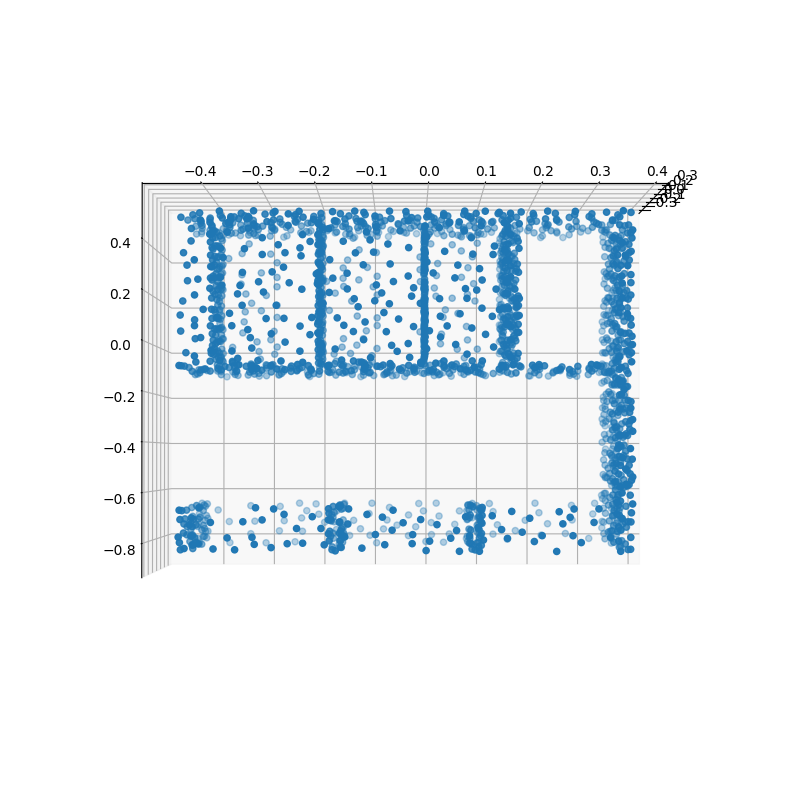

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(10, 10))
ax.scatter(X,Y,Z)
for ii in range(0,360,1):
    ax.view_init(elev=ii, azim=0)
    plt.savefig("./videos/movie%d.png" % ii)
    
# Make a video from the images
import os
os.system(f"ffmpeg -i ./videos/movie%d.png -vcodec mpeg4 ./videos_animate/elev_{item}.mp4")

# Delete the images
os.system("rm ./videos/movie*.png")


## Load using custom dataset

Train dataset size: 10240
{'airplane': 0, 'bathtub': 1, 'bed': 2, 'bench': 3, 'bookshelf': 4, 'bottle': 5, 'bowl': 6, 'car': 7, 'chair': 8, 'cone': 9, 'cup': 10, 'curtain': 11, 'desk': 12, 'door': 13, 'dresser': 14, 'flower_pot': 15, 'glass_box': 16, 'guitar': 17, 'keyboard': 18, 'lamp': 19, 'laptop': 20, 'mantel': 21, 'monitor': 22, 'night_stand': 23, 'person': 24, 'piano': 25, 'plant': 26, 'radio': 27, 'range_hood': 28, 'sink': 29, 'sofa': 30, 'stairs': 31, 'stool': 32, 'table': 33, 'tent': 34, 'toilet': 35, 'tv_stand': 36, 'vase': 37, 'wardrobe': 38, 'xbox': 39}
{0: 'airplane', 1: 'bathtub', 2: 'bed', 3: 'bench', 4: 'bookshelf', 5: 'bottle', 6: 'bowl', 7: 'car', 8: 'chair', 9: 'cone', 10: 'cup', 11: 'curtain', 12: 'desk', 13: 'door', 14: 'dresser', 15: 'flower_pot', 16: 'glass_box', 17: 'guitar', 18: 'keyboard', 19: 'lamp', 20: 'laptop', 21: 'mantel', 22: 'monitor', 23: 'night_stand', 24: 'person', 25: 'piano', 26: 'plant', 27: 'radio', 28: 'range_hood', 29: 'sink', 30: 'sofa', 31: 

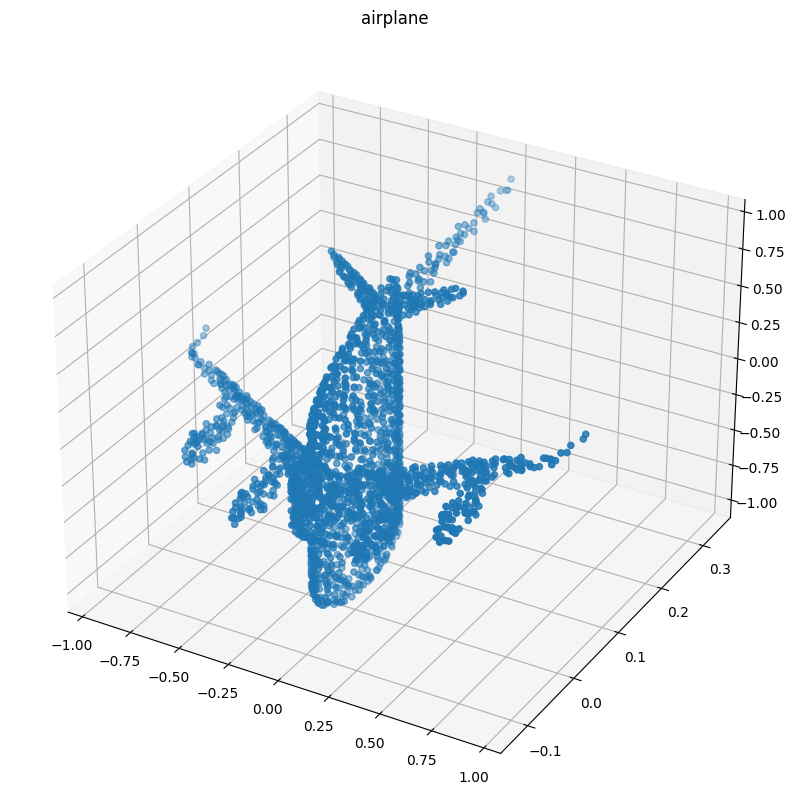

In [48]:
import importlib
import custom_datasets
importlib.reload(custom_datasets)
from torch.utils.data import DataLoader
from custom_datasets import ModelNetPlyHDF52048DataLoader


# Load the dataset
train_dataset = ModelNetPlyHDF52048DataLoader(modelnet40_path, num_point=2048, split='train')
print("Train dataset size:", len(train_dataset))
print(train_dataset.classes_idx)
print(train_dataset.idx_classes)

# Get the first item
item = 7
point_cloud, label = train_dataset[item]
print(point_cloud.shape, label.shape)
X, Y, Z = point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2]

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(10, 10))
plt.title(train_dataset.idx_classes[label[0]])
ax.scatter(X, Y, Z)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
print("Train dataloader size:", len(train_dataloader)) # 10240 / 32 = 320 batches
